In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [8]:
df = pd.read_csv('5000_anime_combined.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2500 non-null   object 
 1   genre               2500 non-null   object 
 2   studio              2494 non-null   object 
 3   number_of_episodes  2466 non-null   float64
 4   release_date        2488 non-null   object 
 5   content_type        2500 non-null   object 
 6   viewer_reviews      2466 non-null   float64
 7   source              2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 156.4+ KB


In [14]:
df.shape

(2500, 8)

In [18]:
print("🎌 ANIME DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Total Anime: {len(df)}")
print(f"Total Features: {len(df.columns)}")

🎌 ANIME DATASET OVERVIEW
Dataset Shape: (2500, 8)
Total Anime: 2500
Total Features: 8


In [26]:
print("\nFirst 5 Rows:")
df.head()


First 5 Rows:


,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25.0,2013-04,Tv,84.0,AniList
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26.0,2019-04,Tv,82.0,AniList
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37.0,2006-10,Tv,84.0,AniList
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24.0,2020-10,Tv,85.0,AniList
4,My Hero Academia,"Action, Adventure, Comedy",bones,13.0,2016-04,Tv,76.0,AniList


In [28]:
print("\n📋 DATASET INFO:")
df.info()


📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               2500 non-null   object 
 1   genre               2500 non-null   object 
 2   studio              2494 non-null   object 
 3   number_of_episodes  2466 non-null   float64
 4   release_date        2488 non-null   object 
 5   content_type        2500 non-null   object 
 6   viewer_reviews      2466 non-null   float64
 7   source              2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 156.4+ KB


In [30]:
print("\n📈 BASIC STATISTICS:")
df.describe(include='all')


📈 BASIC STATISTICS:


,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
count,2500,2500,2494,2466.000000,2488,2500,2466.000000,2500
unique,2500,691,270,NaN,337,8,NaN,1
top,Attack on Titan,"Comedy, Slice of Life",J.C.STAFF,NaN,2023-01,Tv,NaN,AniList
freq,1,97,116,NaN,39,1755,NaN,2500
mean,NaN,NaN,NaN,15.034874,NaN,NaN,71.931873,NaN
std,NaN,NaN,NaN,24.575710,NaN,NaN,7.831661,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,21.000000,NaN
25%,NaN,NaN,NaN,10.000000,NaN,NaN,67.000000,NaN
50%,NaN,NaN,NaN,12.000000,NaN,NaN,72.000000,NaN
75%,NaN,NaN,NaN,13.000000,NaN,NaN,77.000000,NaN


In [40]:
for column in df.columns:
    print(f"{column} have {df[column].nunique()} unique values")

title have 2500 unique values
genre have 691 unique values
studio have 270 unique values
number_of_episodes have 96 unique values
release_date have 337 unique values
content_type have 8 unique values
viewer_reviews have 52 unique values
source have 1 unique values


In [58]:
print("DATA CLEANING")
print ("=" * 50)

#Chcek For missing Values
missing_values = df.isna().sum()
missing_percent = (missing_values/len(df))*100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage':missing_percent
}).sort_values('Missing Count',ascending = False)
print(missing_df)

DATA CLEANING
                    Missing Count  Missing Percentage
number_of_episodes             34                1.36
viewer_reviews                 34                1.36
release_date                   12                0.48
studio                          6                0.24
title                           0                0.00
genre                           0                0.00
content_type                    0                0.00
source                          0                0.00


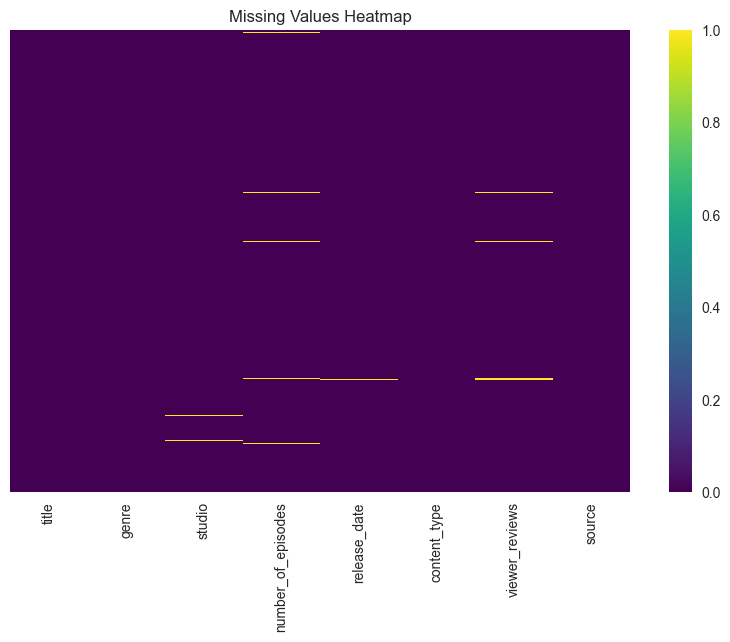

In [60]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [62]:
df_clean = df.copy()

In [64]:
df_clean['genre'] = df_clean['genre'].fillna('Unknown')
df_clean['studio'] = df_clean['studio'].fillna('Unknown')
df_clean['number_of_episodes'] = df_clean['number_of_episodes'].fillna('0')
df_clean['release_date'] = df_clean['release_date'].fillna('Unknown')
df_clean['content_type'] = df_clean['content_type'].fillna('Unknown')
df_clean['viewer_reviews'] = df_clean['viewer_reviews'].fillna('0')

In [66]:
df_clean.isna().sum()

title                 0
genre                 0
studio                0
number_of_episodes    0
release_date          0
content_type          0
viewer_reviews        0
source                0
dtype: int64

In [68]:
df_clean['number_of_episodes'] = pd.to_numeric(df_clean['number_of_episodes'], errors='coerce').fillna(0).astype(int)
df_clean['viewer_reviews'] = pd.to_numeric(df_clean['viewer_reviews'], errors='coerce').fillna(0)


In [70]:
df.head()

,title,genre,studio,number_of_episodes,release_date,content_type,viewer_reviews,source
0,Attack on Titan,"Action, Drama, Fantasy, Mystery",WIT STUDIO,25.0,2013-04,Tv,84.0,AniList
1,Demon Slayer: Kimetsu no Yaiba,"Action, Adventure, Drama, Fantasy, Supernatural",ufotable,26.0,2019-04,Tv,82.0,AniList
2,Death Note,"Mystery, Psychological, Supernatural, Thriller",MADHOUSE,37.0,2006-10,Tv,84.0,AniList
3,JUJUTSU KAISEN,"Action, Drama, Supernatural",Toho,24.0,2020-10,Tv,85.0,AniList
4,My Hero Academia,"Action, Adventure, Comedy",bones,13.0,2016-04,Tv,76.0,AniList


In [72]:
df_clean['release_year'] = df_clean['release_date'].str.extract(r'(\d{4})').astype(float)

In [78]:
df_clean = df_clean.dropna()

In [86]:
print(f"✅ Cleaned dataset shape: {df_clean.shape}")
print(f"Missing values after cleaning: {df_clean.isnull().sum().sum()}")

✅ Cleaned dataset shape: (2488, 9)
Missing values after cleaning: 0


In [88]:
df_clean.isna().sum()

title                 0
genre                 0
studio                0
number_of_episodes    0
release_date          0
content_type          0
viewer_reviews        0
source                0
release_year          0
dtype: int64

#BASIC STATISTICS

In [96]:
print('BASIC STATISTICS')
print("="*50)
total_anime = len(df_clean)
unique_studios = df_clean['studio'].nunique()
unique_genres = len([g.strip() for genres in df_clean['genre'].str.split(',') for g in genres if g.strip() != 'Unknown'])
avg_episodes = df_clean[df_clean['number_of_episodes'] > 0]['number_of_episodes'].mean()
avg_rating = df_clean[df_clean['viewer_reviews'] > 0]['viewer_reviews'].mean()

print(f"📺 Total Anime: {total_anime:,}")
print(f"🏢 Unique Studios: {unique_studios:,}")
print(f"🎭 Total Genre Mentions: {unique_genres:,}")
print(f"📈 Average Episodes: {avg_episodes:.1f}")
print(f"⭐ Average Rating: {avg_rating:.1f}")

BASIC STATISTICS
📺 Total Anime: 2,488
🏢 Unique Studios: 271
🎭 Total Genre Mentions: 8,645
📈 Average Episodes: 15.1
⭐ Average Rating: 71.9


In [98]:
valid_years = df_clean[df_clean['release_year'].notna()]['release_year']
if len(valid_years) > 0:
    print(f"📅 Year Range: {int(valid_years.min())} - {int(valid_years.max())}")

📅 Year Range: 1970 - 2026


Distribution Analysis


Distribution Analysis


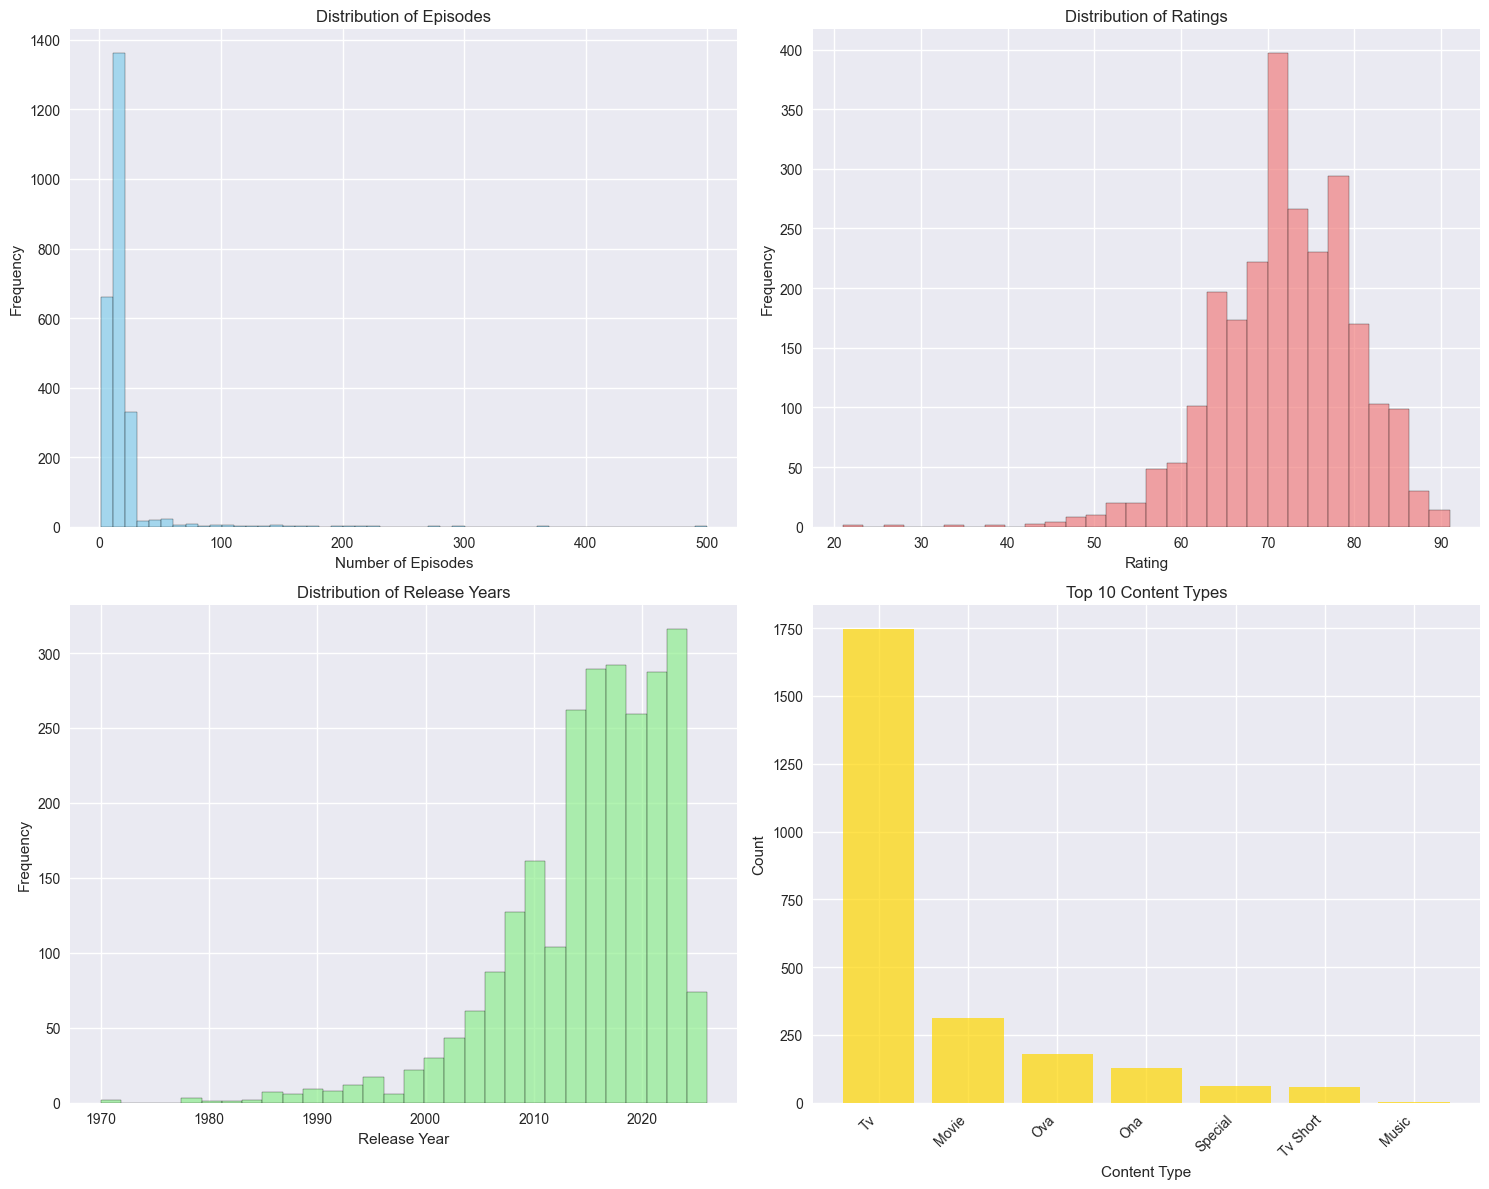

In [101]:
print("Distribution Analysis")
print("="*50)

fig , axes = plt.subplots(2,2,figsize=(15,12))
episodes_data = df_clean[df_clean['number_of_episodes'] > 0]['number_of_episodes']
axes[0,0].hist(episodes_data, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Episodes')
axes[0,0].set_xlabel('Number of Episodes')
axes[0,0].set_ylabel('Frequency')

rating_data = df_clean[df_clean['viewer_reviews'] > 0]['viewer_reviews']
axes[0,1].hist(rating_data, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution of Ratings')
axes[0,1].set_xlabel('Rating')
axes[0,1].set_ylabel('Frequency')

year_data = df_clean[df_clean['release_year'].notna()]['release_year']
axes[1,0].hist(year_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Distribution of Release Years')
axes[1,0].set_xlabel('Release Year')
axes[1,0].set_ylabel('Frequency')

content_counts = df_clean['content_type'].value_counts().head(10)
axes[1,1].bar(range(len(content_counts)), content_counts.values, color='gold', alpha=0.7)
axes[1,1].set_title('Top 10 Content Types')
axes[1,1].set_xlabel('Content Type')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticks(range(len(content_counts)))
axes[1,1].set_xticklabels(content_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [103]:
print(f"\n📊 EPISODES STATISTICS:")
print(f"Mean: {episodes_data.mean():.1f}")
print(f"Median: {episodes_data.median():.1f}")
print(f"Mode: {episodes_data.mode().iloc[0] if len(episodes_data.mode()) > 0 else 'N/A'}")
print(f"Range: {episodes_data.min()} - {episodes_data.max()}")

print(f"\n⭐ RATING STATISTICS:")
print(f"Mean: {rating_data.mean():.2f}")
print(f"Median: {rating_data.median():.2f}")
print(f"Range: {rating_data.min():.1f} - {rating_data.max():.1f}")


📊 EPISODES STATISTICS:
Mean: 15.1
Median: 12.0
Mode: 12
Range: 1 - 500

⭐ RATING STATISTICS:
Mean: 71.93
Median: 72.00
Range: 21.0 - 91.0


🎭 GENRE ANALYSIS
Total unique genres: 19
Most common genres:
Comedy           1167
Action           1151
Drama             885
Fantasy           851
Romance           814
Slice of Life     634
Adventure         601
Supernatural      592
Sci-Fi            457
Ecchi             323
Name: count, dtype: int64


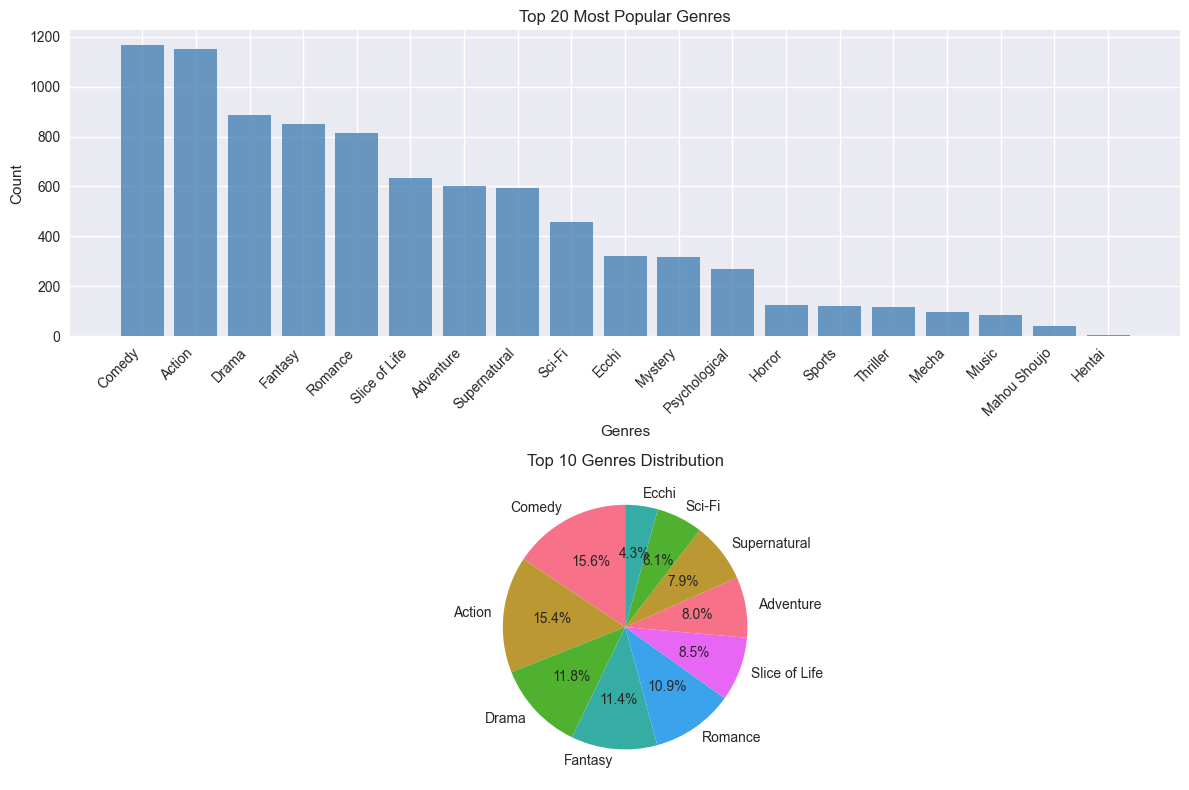

In [105]:
print("🎭 GENRE ANALYSIS")
print("=" * 50)


all_genres = []
for genres in df_clean['genre'].dropna():
    if genres != 'Unknown':
        genre_list = [g.strip() for g in genres.split(',')]
        all_genres.extend(genre_list)

genre_counts = pd.Series(all_genres).value_counts()
print(f"Total unique genres: {len(genre_counts)}")
print(f"Most common genres:")
print(genre_counts.head(10))


plt.figure(figsize=(12, 8))
top_20_genres = genre_counts.head(20)

plt.subplot(2, 1, 1)
plt.bar(range(len(top_20_genres)), top_20_genres.values, color='steelblue', alpha=0.8)
plt.title('Top 20 Most Popular Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(range(len(top_20_genres)), top_20_genres.index, rotation=45, ha='right')


plt.subplot(2, 1, 2)
plt.pie(genre_counts.head(10).values, labels=genre_counts.head(10).index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 Genres Distribution')

plt.tight_layout()
plt.show()



🔗 GENRE COMBINATIONS ANALYSIS:
Most common genre combinations:
genre
Comedy, Slice of Life                    97
Comedy, Romance, Slice of Life           86
Action, Adventure, Fantasy               79
Action, Adventure, Comedy, Fantasy       55
Comedy, Drama, Romance, Slice of Life    42
Comedy, Romance                          40
Drama, Romance, Slice of Life            30
Comedy, Ecchi, Romance                   29
Action, Fantasy                          24
Comedy, Drama, Sports                    23
Name: count, dtype: int64


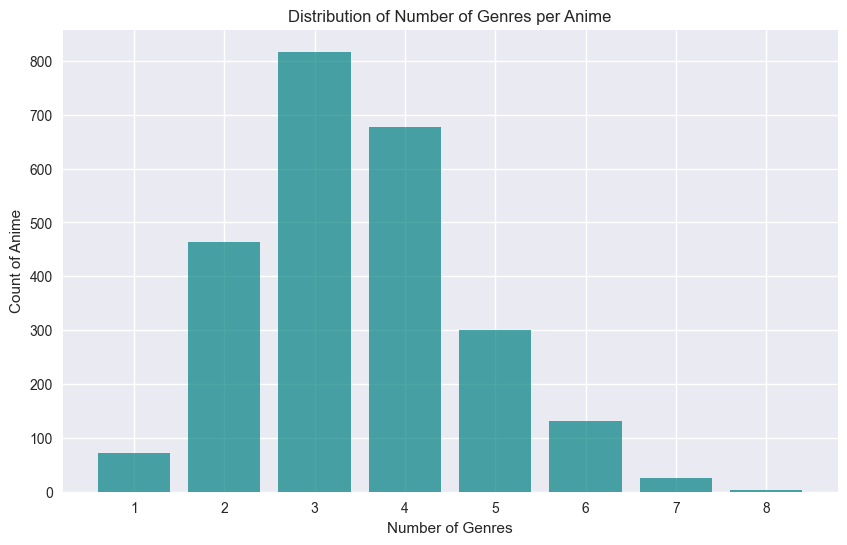

Average genres per anime: 3.5


In [107]:
print("\n🔗 GENRE COMBINATIONS ANALYSIS:")
genre_combo_counts = df_clean[df_clean['genre'] != 'Unknown']['genre'].value_counts()
print("Most common genre combinations:")
print(genre_combo_counts.head(10))

# Number of genres per anime
df_clean['genre_count'] = df_clean['genre'].apply(
    lambda x: len([g.strip() for g in x.split(',')]) if x != 'Unknown' else 0
)

plt.figure(figsize=(10, 6))
genre_count_dist = df_clean['genre_count'].value_counts().sort_index()
plt.bar(genre_count_dist.index, genre_count_dist.values, color='teal', alpha=0.7)
plt.title('Distribution of Number of Genres per Anime')
plt.xlabel('Number of Genres')
plt.ylabel('Count of Anime')
plt.show()

print(f"Average genres per anime: {df_clean['genre_count'].mean():.1f}")

Studio Analysis
Total unique studios: 270
Top 15 most prolific studios:
studio
J.C.STAFF            116
Aniplex              104
MADHOUSE             102
Production I.G        79
bones                 74
A-1 Pictures          74
Toei Animation        73
Kyoto Animation       65
Sunrise               58
Studio Pierrot        49
SILVER LINK.          47
Studio DEEN           47
MAPPA                 45
TMS Entertainment     38
KADOKAWA              38
Name: count, dtype: int64


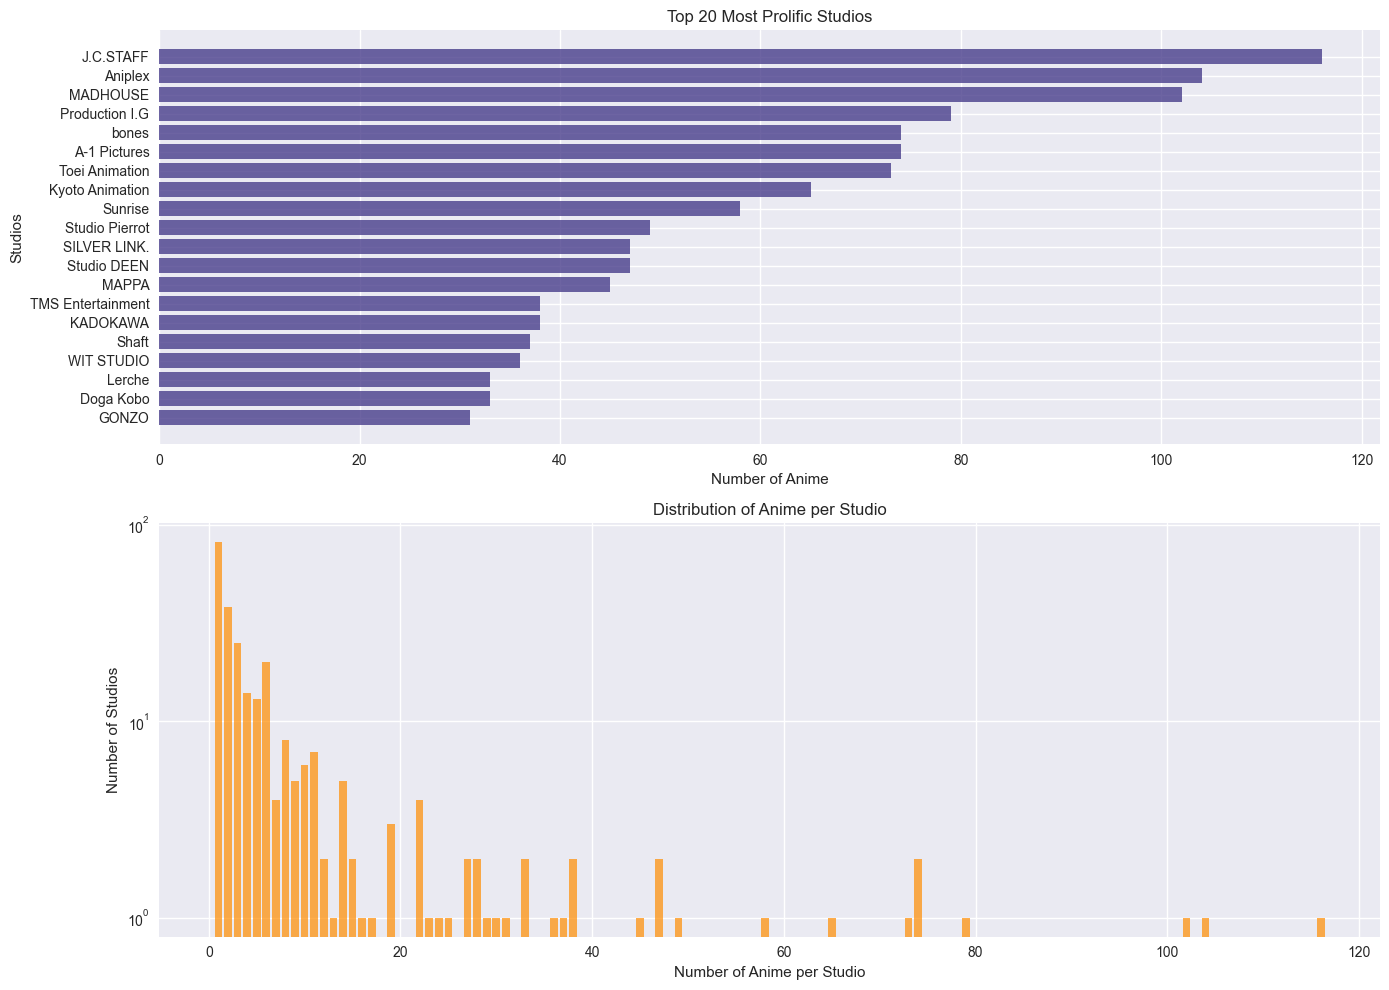


Studios with only 1 anime: 82
Studios with 10+ anime: 61


In [109]:
print("Studio Analysis")
print("="*50)
studio_counts = df_clean[df_clean['studio'] != 'Unknown']['studio'].value_counts()
print(f"Total unique studios: {len(studio_counts)}")
print(f"Top 15 most prolific studios:")
print(studio_counts.head(15))

# Visualize top studios
plt.figure(figsize=(14, 10))

# Top studios bar chart
plt.subplot(2, 1, 1)
top_20_studios = studio_counts.head(20)
plt.barh(range(len(top_20_studios)), top_20_studios.values, color='darkslateblue', alpha=0.8)
plt.title('Top 20 Most Prolific Studios')
plt.xlabel('Number of Anime')
plt.ylabel('Studios')
plt.yticks(range(len(top_20_studios)), top_20_studios.index)
plt.gca().invert_yaxis()

# Studio distribution
plt.subplot(2, 1, 2)
studio_anime_counts = studio_counts.value_counts().sort_index()
plt.bar(studio_anime_counts.index, studio_anime_counts.values, color='darkorange', alpha=0.7)
plt.title('Distribution of Anime per Studio')
plt.xlabel('Number of Anime per Studio')
plt.ylabel('Number of Studios')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"\nStudios with only 1 anime: {studio_anime_counts.get(1, 0)}")
print(f"Studios with 10+ anime: {studio_anime_counts[studio_anime_counts.index >= 10].sum()}")

📋 CONTENT TYPE ANALYSIS
Content type distribution:
content_type
Tv          1747
Movie        313
Ova          181
Ona          127
Special       62
Tv Short      56
Music          2
Name: count, dtype: int64


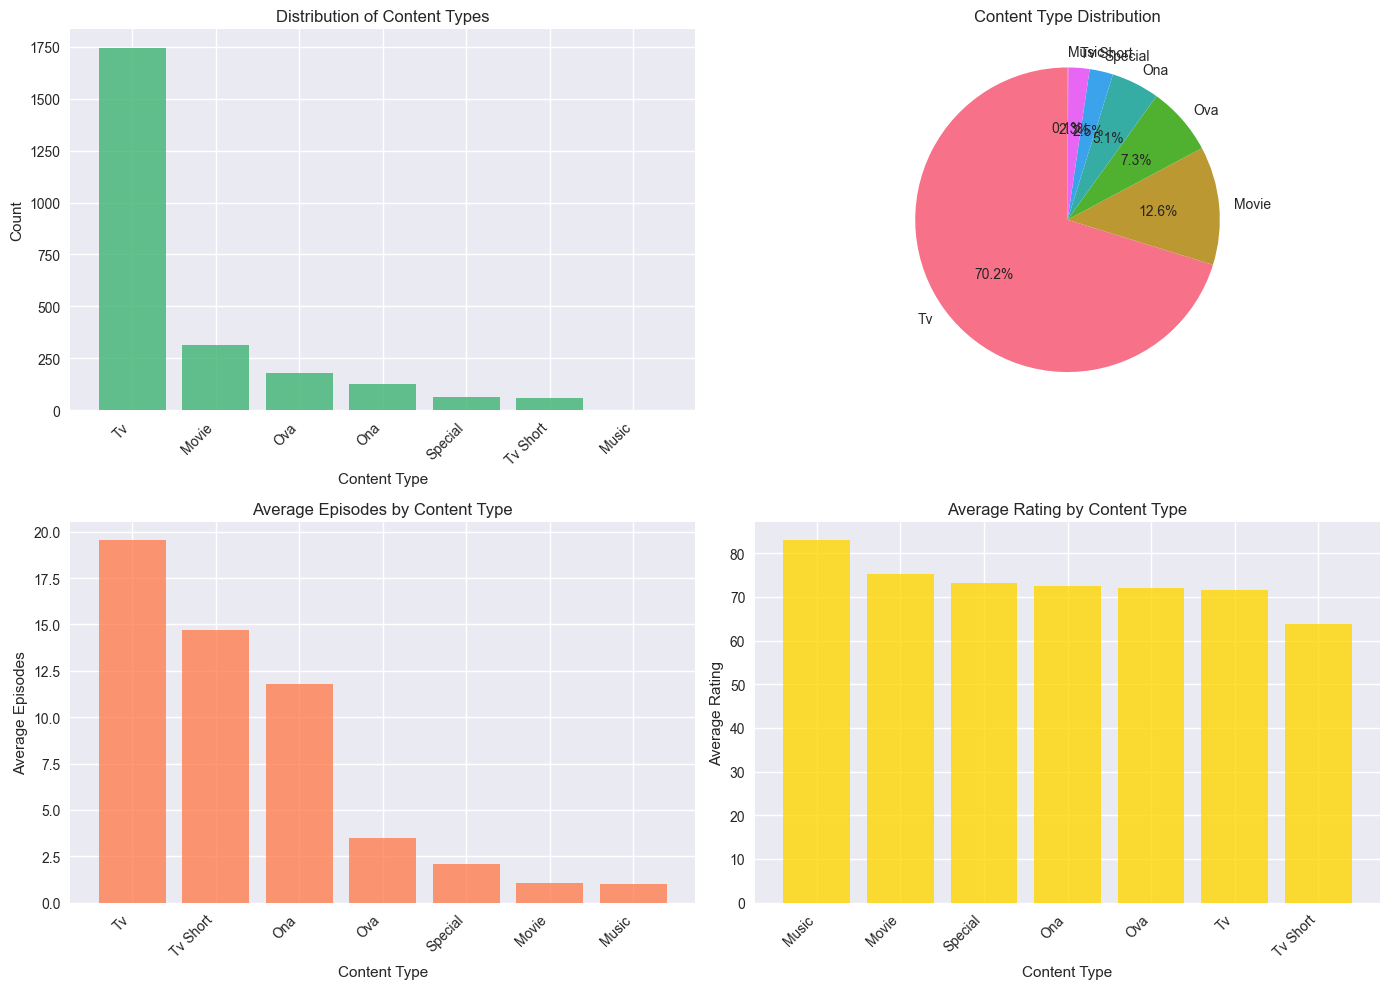

In [111]:
print("📋 CONTENT TYPE ANALYSIS")
print("=" * 50)

# Content type distribution
content_type_counts = df_clean['content_type'].value_counts()
print("Content type distribution:")
print(content_type_counts)

# Visualize content types
plt.figure(figsize=(14, 10))

# Content type bar chart
plt.subplot(2, 2, 1)
plt.bar(range(len(content_type_counts)), content_type_counts.values, color='mediumseagreen', alpha=0.8)
plt.title('Distribution of Content Types')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.xticks(range(len(content_type_counts)), content_type_counts.index, rotation=45, ha='right')

# Content type pie chart
plt.subplot(2, 2, 2)
plt.pie(content_type_counts.values, labels=content_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Content Type Distribution')

# Episodes by content type
plt.subplot(2, 2, 3)
episode_by_type = df_clean[df_clean['number_of_episodes'] > 0].groupby('content_type')['number_of_episodes'].mean().sort_values(ascending=False)
plt.bar(range(len(episode_by_type)), episode_by_type.values, color='coral', alpha=0.8)
plt.title('Average Episodes by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Episodes')
plt.xticks(range(len(episode_by_type)), episode_by_type.index, rotation=45, ha='right')

# Rating by content type
plt.subplot(2, 2, 4)
rating_by_type = df_clean[df_clean['viewer_reviews'] > 0].groupby('content_type')['viewer_reviews'].mean().sort_values(ascending=False)
plt.bar(range(len(rating_by_type)), rating_by_type.values, color='gold', alpha=0.8)
plt.title('Average Rating by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Rating')
plt.xticks(range(len(rating_by_type)), rating_by_type.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

⭐ RATING ANALYSIS
Rating statistics:
Mean: 71.93
Median: 72.00
Standard deviation: 7.83
Min: 21.00
Max: 91.00


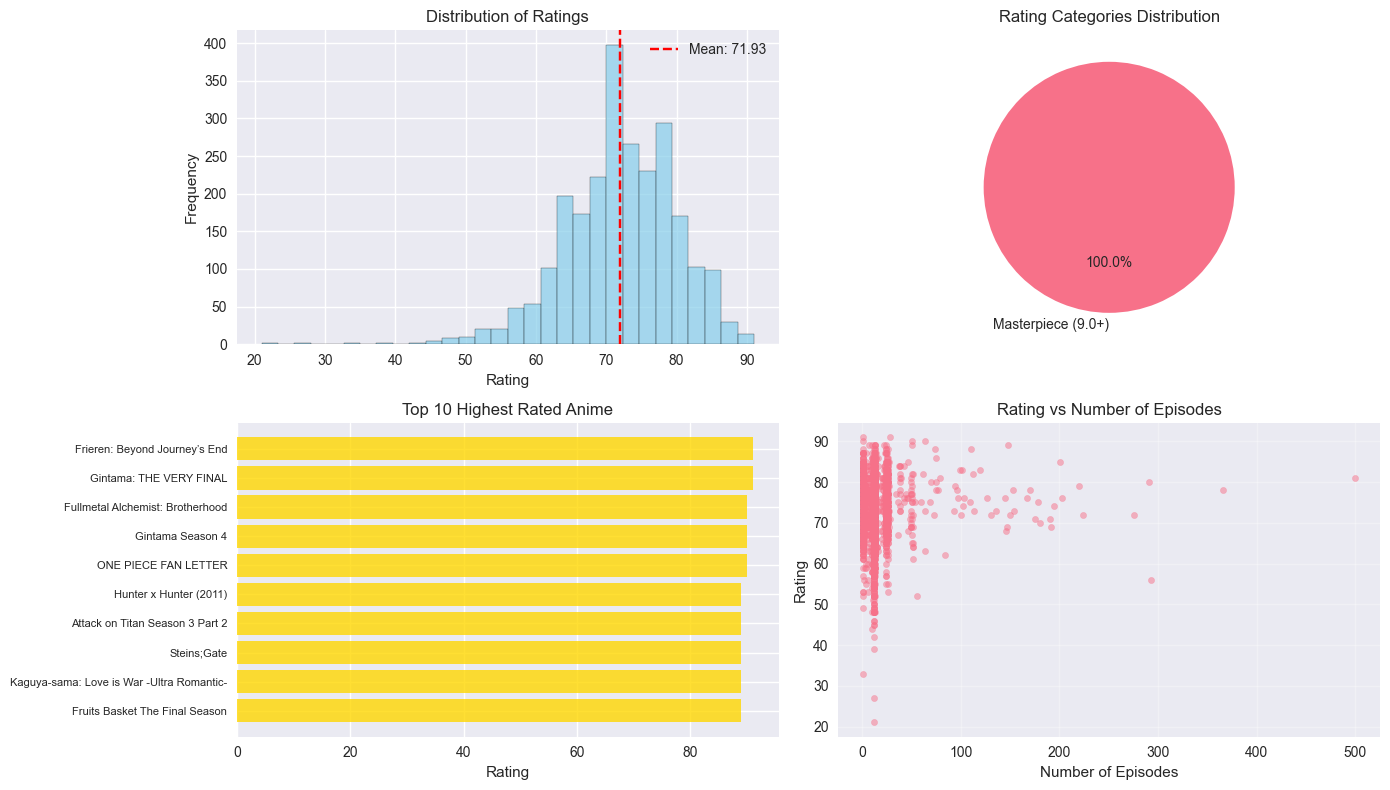


Top 10 highest rated anime:
                                          title  viewer_reviews content_type  release_year
99                Frieren: Beyond Journey’s End            91.0           Tv        2023.0
1347                    Gintama: THE VERY FINAL            91.0        Movie        2021.0
10             Fullmetal Alchemist: Brotherhood            90.0           Tv        2009.0
545                            Gintama Season 4            90.0           Tv        2015.0
1695                       ONE PIECE FAN LETTER            90.0      Special        2024.0
5                        Hunter x Hunter (2011)            89.0           Tv        2011.0
25              Attack on Titan Season 3 Part 2            89.0           Tv        2019.0
27                                  Steins;Gate            89.0           Tv        2011.0
159   Kaguya-sama: Love is War -Ultra Romantic-            89.0           Tv        2022.0
342              Fruits Basket The Final Season            89

In [115]:
print("⭐ RATING ANALYSIS")
print("=" * 50)

# Rating statistics
rating_data = df_clean[df_clean['viewer_reviews'] > 0]['viewer_reviews']

print(f"Rating statistics:")
print(f"Mean: {rating_data.mean():.2f}")
print(f"Median: {rating_data.median():.2f}")
print(f"Standard deviation: {rating_data.std():.2f}")
print(f"Min: {rating_data.min():.2f}")
print(f"Max: {rating_data.max():.2f}")

# Rating categories
def categorize_rating(rating):
    if rating >= 9.0:
        return 'Masterpiece (9.0+)'
    elif rating >= 8.0:
        return 'Great (8.0-8.9)'
    elif rating >= 7.0:
        return 'Good (7.0-7.9)'
    elif rating >= 6.0:
        return 'Fine (6.0-6.9)'
    elif rating >= 5.0:
        return 'Average (5.0-5.9)'
    else:
        return 'Poor (<5.0)'

df_clean['rating_category'] = df_clean['viewer_reviews'].apply(categorize_rating)
rating_categories = df_clean[df_clean['viewer_reviews'] > 0]['rating_category'].value_counts()

plt.figure(figsize=(14, 8))

# Rating distribution histogram
plt.subplot(2, 2, 1)
plt.hist(rating_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(rating_data.mean(), color='red', linestyle='--', label=f'Mean: {rating_data.mean():.2f}')
plt.legend()

# Rating categories
plt.subplot(2, 2, 2)
plt.pie(rating_categories.values, labels=rating_categories.index, autopct='%1.1f%%', startangle=90)
plt.title('Rating Categories Distribution')

# Top rated anime
plt.subplot(2, 2, 3)
top_rated = df_clean[df_clean['viewer_reviews'] > 0].nlargest(10, 'viewer_reviews')
plt.barh(range(len(top_rated)), top_rated['viewer_reviews'], color='gold', alpha=0.8)
plt.title('Top 10 Highest Rated Anime')
plt.xlabel('Rating')
plt.yticks(range(len(top_rated)), top_rated['title'], fontsize=8)
plt.gca().invert_yaxis()

# Rating vs Episodes scatter
plt.subplot(2, 2, 4)
valid_data = df_clean[(df_clean['viewer_reviews'] > 0) & (df_clean['number_of_episodes'] > 0)]
plt.scatter(valid_data['number_of_episodes'], valid_data['viewer_reviews'], alpha=0.5, s=20)
plt.title('Rating vs Number of Episodes')
plt.xlabel('Number of Episodes')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTop 10 highest rated anime:")
print(top_rated[['title', 'viewer_reviews', 'content_type', 'release_year']].to_string())